In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA

In [2]:
data = load_breast_cancer()
X, y = data.data, data.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = LogisticRegression(max_iter=10000, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, solver='liblinear')

In [8]:
y_pred = model.predict(X_test)


In [10]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [11]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9561
Precision: 0.9459
Recall: 0.9859
F1 Score: 0.9655


In [13]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [14]:
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
model_2d = LogisticRegression(max_iter=10000, solver='liblinear')
model_2d.fit(X_train_2d, y_train_2d)

LogisticRegression(max_iter=10000, solver='liblinear')

In [16]:
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

In [17]:
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


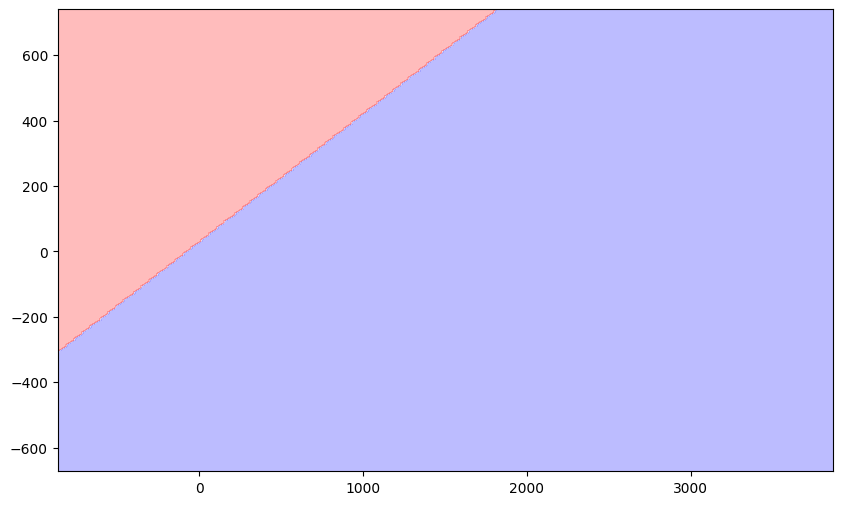

In [18]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.bwr)

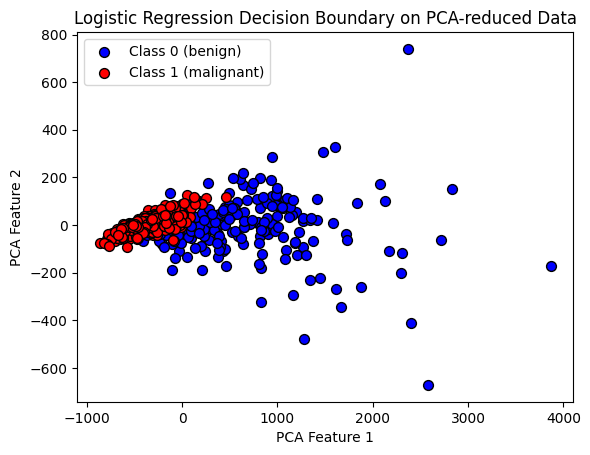

In [19]:
plt.scatter(X_reduced[y==0, 0], X_reduced[y==0, 1], color='blue', label='Class 0 (benign)', edgecolor='k', s=50)
plt.scatter(X_reduced[y==1, 0], X_reduced[y==1, 1], color='red', label='Class 1 (malignant)', edgecolor='k', s=50)

plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('Logistic Regression Decision Boundary on PCA-reduced Data')
plt.legend()
plt.show()